# IMPORTING LIBRARES NEEDED 

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score

# Read input data 

In [12]:
wine = pd.read_csv ('C:/Users/Abbey.AELLA/Documents/My work space/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Describe the data

In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data info
from the data below it shows there is no null value in the data 

In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Data plot 

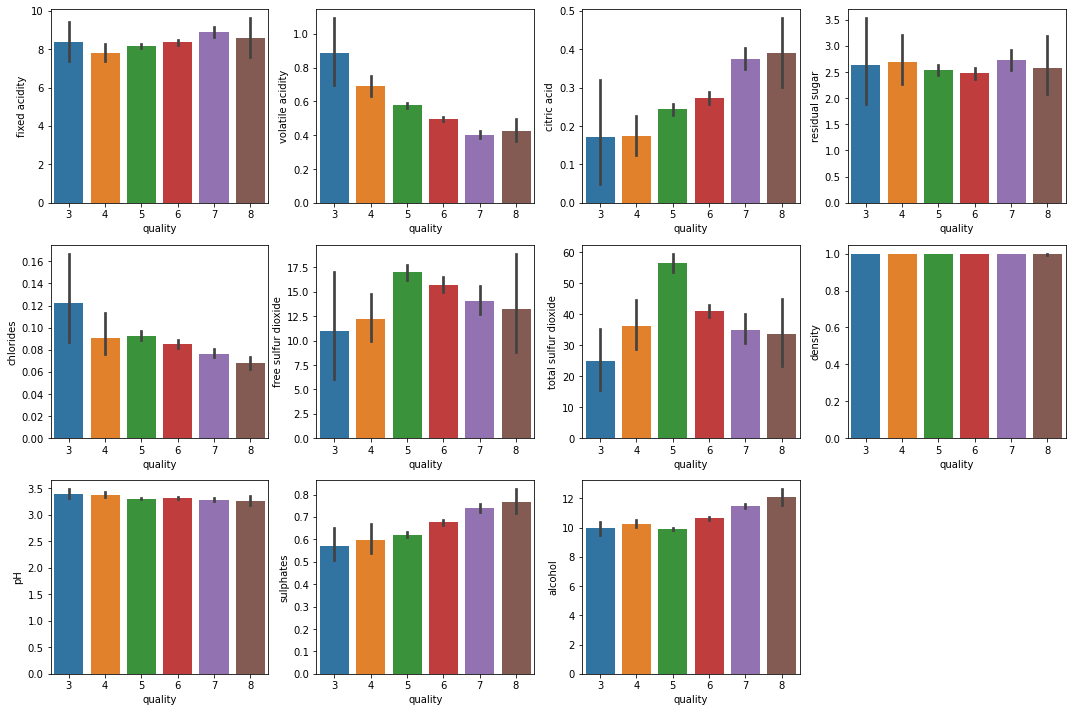

In [17]:
fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)
plt.tight_layout()

# Counting the number of instance for each class 

As we can see  we have 6 classes of quality that are 3,4,5,6,7,8 but we don’t want it like this.

So what we will do is we will mark every rating from 3 to 6 as BAD and ratings of 7 and 8 as GOOD.

In [18]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# changing the categories to two which is either good or bad

In [19]:
ranges = (2,6.5,8) 
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

#Here we are cutting bins use pd.cut() in 2 categories 2-6.5 as BAD and 6.5-8 as GOOD.

# we converting bad and good to 0 and 1 respectively in the quality feature 

In [20]:
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [21]:
#Checking count for quality feature after converting 
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

As we can see we have two value now which is 0 and 1

# Balancing the two classes

In this step, we are simply balancing our dataset.
We are making a new data frame good_quality in which we will have data of just good_quality wine or we can say where the quality is 1.
Similarly, we are making for bad_quality.
Then we are simply shuffling bad quality data using df.sample(frac=1). It means shuffle the data and take a 100% fraction of the data.
Then we are taking out 217 samples of bad_quality because we have just 217 samples of good_quality.
Then we are joining both 217 samples of each class and our final data frame will have 217*2=434 rows.
Finally, again shuffling the data.

In [23]:
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]
bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]
new_wine = pd.concat([good_quality,bad_quality])
new_wine = new_wine.sample(frac=1)
new_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1373,7.7,0.75,0.27,3.8,0.110,34.0,89.0,0.99664,3.24,0.45,9.3,0
946,10.2,0.44,0.58,4.1,0.092,11.0,24.0,0.99745,3.29,0.99,12.0,1
836,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,1
209,11.0,0.30,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5,1
1147,10.0,0.41,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
139,7.8,0.56,0.19,2.0,0.081,17.0,108.0,0.99620,3.32,0.54,9.5,0
1538,6.2,0.64,0.09,2.5,0.081,15.0,26.0,0.99538,3.57,0.63,12.0,0
1056,8.9,0.48,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,1
1177,7.1,0.66,0.00,2.4,0.052,6.0,11.0,0.99318,3.35,0.66,12.7,1


# Again checking for the count of classes  in the new dataframe 

In [25]:
new_wine['quality'].value_counts()

0    217
1    217
Name: quality, dtype: int64

Now  that both the classes have 217 instances and hence our data is shuffled.


# Checking correlation between columns 

In [26]:
new_wine.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.489677
citric acid             0.308776
sulphates               0.257398
fixed acidity           0.160676
residual sugar          0.065945
free sulfur dioxide    -0.075332
pH                     -0.084884
chlorides              -0.146738
total sulfur dioxide   -0.151547
density                -0.172208
volatile acidity       -0.382892
Name: quality, dtype: float64

<AxesSubplot:>

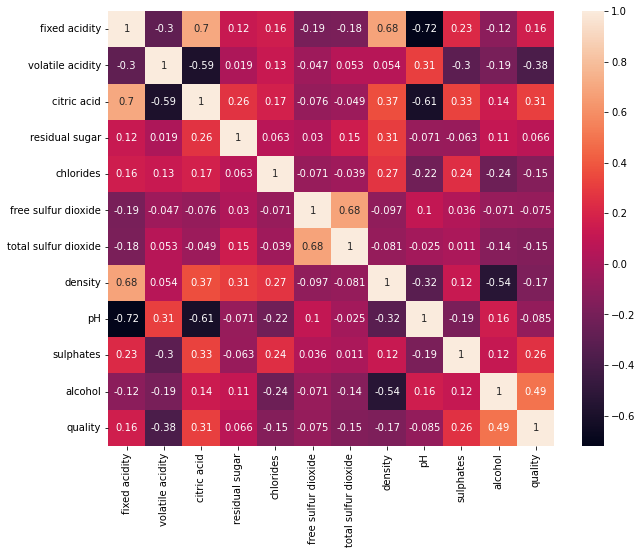

In [92]:
cor = new_wine.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor, annot = True)

From the above info we can infer that quality is highly dependent on the alcohol quantity in the wine.

# Splitting the data in train and test.

In [51]:
x = new_wine.iloc[:, :-1]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1373,7.7,0.75,0.27,3.8,0.110,34.0,89.0,0.99664,3.24,0.45,9.3
946,10.2,0.44,0.58,4.1,0.092,11.0,24.0,0.99745,3.29,0.99,12.0
836,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7
209,11.0,0.30,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5
1147,10.0,0.41,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.8


In [50]:
y = new_wine.iloc[:, -1]
y.head()

1373    0
946     1
836     1
209     1
1147    1
Name: quality, dtype: int32

In [33]:
#Building Models

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Training models
We created a simple line of code to run six models on the dataset instead of do it one after the other. so the program run the six model simultanoeusly 

In [87]:
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    #     print("Print accuracy on Training data is {}".format(tr_auc))
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100

    Recall = recall_score(predicted, ytest, average = 'micro')
    
    Precision = precision_score(predicted, ytest, average = 'micro')
    
    F1 = f1_score(predicted, ytest, average = 'micro')
    
    MSE = mean_squared_error(predicted, ytest)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['Recall'].append(Recall)
    d['Precision'].append(Precision)
    d['F1_Score'].append(F1)
    d['MSE'].append(MSE)
    
    print("**********"*5)
    print()
    return d

Putting the result of the model in a DataFrame 

In [90]:
d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 'Recall': [], 'Precision': [], 'F1_Score': [], 'MSE': []}
models = [ [RandomForestClassifier(n_estimators = 350), 'Random Forest'], [DecisionTreeClassifier(), 'Decision Tree'], [LGBMClassifier(device_type = 'gpu'), 'LightGBM'], [CatBoostClassifier(), 'CatBoost'], [GaussianNB(), 'Naive Bayes'], [LogisticRegression(), 'Logistic Regression'], [SVC(), 'Support Vector Machine'] ]

for model in models:
    d = Models(model[0], model[1], d)
    
acu_data = pd.DataFrame(data = d)

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on LightGBM model
**************************************************

Working on CatBoost model
Learning rate set to 0.006556
0:	learn: 0.6890486	total: 7.28ms	remaining: 7.27s
1:	learn: 0.6863741	total: 12.6ms	remaining: 6.26s
2:	learn: 0.6828838	total: 17.8ms	remaining: 5.92s
3:	learn: 0.6793415	total: 23.3ms	remaining: 5.8s
4:	learn: 0.6757732	total: 28.5ms	remaining: 5.68s
5:	learn: 0.6735733	total: 33.6ms	remaining: 5.57s
6:	learn: 0.6699956	total: 39ms	remaining: 5.53s
7:	learn: 0.6666111	total: 44.4ms	remaining: 5.5s
8:	learn: 0.6632845	total: 49.8ms	remaining: 5.49s
9:	learn: 0.6602740	total: 55.2ms	remaining: 5.46s
10:	learn: 0.6575489	total: 60.4ms	remaining: 5.43s
11:	learn: 0.6538143	total: 65.8ms	remaining: 5.42s
12:	learn: 0.6507756	total: 70.9ms	remaining: 5.38s
13:	learn: 0.6469419	total: 76.1ms	rem

156:	learn: 0.4182790	total: 631ms	remaining: 3.39s
157:	learn: 0.4176268	total: 634ms	remaining: 3.38s
158:	learn: 0.4169415	total: 637ms	remaining: 3.37s
159:	learn: 0.4161398	total: 639ms	remaining: 3.35s
160:	learn: 0.4153432	total: 641ms	remaining: 3.34s
161:	learn: 0.4142704	total: 643ms	remaining: 3.33s
162:	learn: 0.4137120	total: 645ms	remaining: 3.31s
163:	learn: 0.4127704	total: 648ms	remaining: 3.3s
164:	learn: 0.4121591	total: 650ms	remaining: 3.29s
165:	learn: 0.4112810	total: 652ms	remaining: 3.28s
166:	learn: 0.4105863	total: 656ms	remaining: 3.27s
167:	learn: 0.4098772	total: 660ms	remaining: 3.27s
168:	learn: 0.4087407	total: 664ms	remaining: 3.27s
169:	learn: 0.4079705	total: 668ms	remaining: 3.26s
170:	learn: 0.4070227	total: 672ms	remaining: 3.26s
171:	learn: 0.4061914	total: 676ms	remaining: 3.25s
172:	learn: 0.4055575	total: 680ms	remaining: 3.25s
173:	learn: 0.4047794	total: 684ms	remaining: 3.25s
174:	learn: 0.4038091	total: 688ms	remaining: 3.24s
175:	learn: 0

335:	learn: 0.3153755	total: 1.31s	remaining: 2.58s
336:	learn: 0.3148660	total: 1.31s	remaining: 2.58s
337:	learn: 0.3144970	total: 1.31s	remaining: 2.57s
338:	learn: 0.3137929	total: 1.32s	remaining: 2.57s
339:	learn: 0.3134483	total: 1.32s	remaining: 2.56s
340:	learn: 0.3131318	total: 1.32s	remaining: 2.56s
341:	learn: 0.3125623	total: 1.32s	remaining: 2.55s
342:	learn: 0.3121097	total: 1.33s	remaining: 2.54s
343:	learn: 0.3118783	total: 1.33s	remaining: 2.53s
344:	learn: 0.3112050	total: 1.33s	remaining: 2.53s
345:	learn: 0.3107845	total: 1.34s	remaining: 2.53s
346:	learn: 0.3104309	total: 1.34s	remaining: 2.52s
347:	learn: 0.3099521	total: 1.34s	remaining: 2.52s
348:	learn: 0.3094882	total: 1.35s	remaining: 2.51s
349:	learn: 0.3090859	total: 1.35s	remaining: 2.51s
350:	learn: 0.3086596	total: 1.35s	remaining: 2.51s
351:	learn: 0.3084220	total: 1.36s	remaining: 2.5s
352:	learn: 0.3079508	total: 1.36s	remaining: 2.49s
353:	learn: 0.3076999	total: 1.36s	remaining: 2.49s
354:	learn: 0

512:	learn: 0.2584308	total: 1.98s	remaining: 1.88s
513:	learn: 0.2582637	total: 1.98s	remaining: 1.88s
514:	learn: 0.2579689	total: 1.99s	remaining: 1.87s
515:	learn: 0.2579137	total: 1.99s	remaining: 1.87s
516:	learn: 0.2577008	total: 1.99s	remaining: 1.86s
517:	learn: 0.2575328	total: 2s	remaining: 1.86s
518:	learn: 0.2573467	total: 2s	remaining: 1.85s
519:	learn: 0.2567915	total: 2s	remaining: 1.85s
520:	learn: 0.2565973	total: 2.01s	remaining: 1.84s
521:	learn: 0.2563577	total: 2.01s	remaining: 1.84s
522:	learn: 0.2561291	total: 2.02s	remaining: 1.84s
523:	learn: 0.2559494	total: 2.02s	remaining: 1.83s
524:	learn: 0.2557738	total: 2.02s	remaining: 1.83s
525:	learn: 0.2553612	total: 2.03s	remaining: 1.83s
526:	learn: 0.2551408	total: 2.03s	remaining: 1.82s
527:	learn: 0.2546556	total: 2.04s	remaining: 1.82s
528:	learn: 0.2544250	total: 2.04s	remaining: 1.82s
529:	learn: 0.2541393	total: 2.04s	remaining: 1.81s
530:	learn: 0.2538996	total: 2.05s	remaining: 1.81s
531:	learn: 0.2535175

681:	learn: 0.2179662	total: 2.66s	remaining: 1.24s
682:	learn: 0.2178636	total: 2.66s	remaining: 1.24s
683:	learn: 0.2177006	total: 2.67s	remaining: 1.23s
684:	learn: 0.2174130	total: 2.67s	remaining: 1.23s
685:	learn: 0.2171998	total: 2.67s	remaining: 1.22s
686:	learn: 0.2171474	total: 2.67s	remaining: 1.22s
687:	learn: 0.2170541	total: 2.68s	remaining: 1.21s
688:	learn: 0.2167790	total: 2.68s	remaining: 1.21s
689:	learn: 0.2167119	total: 2.68s	remaining: 1.2s
690:	learn: 0.2164223	total: 2.68s	remaining: 1.2s
691:	learn: 0.2161235	total: 2.69s	remaining: 1.2s
692:	learn: 0.2159773	total: 2.69s	remaining: 1.19s
693:	learn: 0.2159363	total: 2.7s	remaining: 1.19s
694:	learn: 0.2157635	total: 2.7s	remaining: 1.18s
695:	learn: 0.2155702	total: 2.7s	remaining: 1.18s
696:	learn: 0.2152770	total: 2.71s	remaining: 1.18s
697:	learn: 0.2150892	total: 2.71s	remaining: 1.17s
698:	learn: 0.2147728	total: 2.72s	remaining: 1.17s
699:	learn: 0.2145054	total: 2.72s	remaining: 1.17s
700:	learn: 0.2140

864:	learn: 0.1820144	total: 3.34s	remaining: 521ms
865:	learn: 0.1817953	total: 3.34s	remaining: 517ms
866:	learn: 0.1815680	total: 3.35s	remaining: 513ms
867:	learn: 0.1814163	total: 3.35s	remaining: 509ms
868:	learn: 0.1812898	total: 3.35s	remaining: 505ms
869:	learn: 0.1811037	total: 3.35s	remaining: 501ms
870:	learn: 0.1808737	total: 3.36s	remaining: 497ms
871:	learn: 0.1806786	total: 3.36s	remaining: 493ms
872:	learn: 0.1805007	total: 3.36s	remaining: 489ms
873:	learn: 0.1801522	total: 3.37s	remaining: 485ms
874:	learn: 0.1800596	total: 3.37s	remaining: 481ms
875:	learn: 0.1800338	total: 3.37s	remaining: 477ms
876:	learn: 0.1797857	total: 3.38s	remaining: 473ms
877:	learn: 0.1796724	total: 3.38s	remaining: 470ms
878:	learn: 0.1793572	total: 3.38s	remaining: 466ms
879:	learn: 0.1792842	total: 3.39s	remaining: 462ms
880:	learn: 0.1792262	total: 3.39s	remaining: 458ms
881:	learn: 0.1791005	total: 3.39s	remaining: 454ms
882:	learn: 0.1788261	total: 3.4s	remaining: 450ms
883:	learn: 0

In [91]:
acu_data

,Name,Training ACU,Testing ACU,Recall,Precision,F1_Score,MSE
0,Random Forest,100.000000,78.160920,0.781609,0.781609,0.781609,0.218391
1,Decision Tree,100.000000,75.862069,0.758621,0.758621,0.758621,0.241379
2,LightGBM,100.000000,80.459770,0.804598,0.804598,0.804598,0.195402
3,CatBoost,98.270893,75.862069,0.758621,0.758621,0.758621,0.241379
4,Naive Bayes,75.216138,72.413793,0.724138,0.724138,0.724138,0.275862
5,Logistic Regression,77.809798,74.712644,0.747126,0.747126,0.747126,0.252874
6,Support Vector Machine,63.112392,54.022989,0.540230,0.540230,0.540230,0.459770


We use six models which are Randmom Forest, Decision Tree, LightGBM, catBoost, Naive bayes, Logistic Regression, Support Vector Machine SVM. 
According to the F1_Score above the best model among the six is LightGBM which is 80%